# Imports

In [1]:
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
from torch.utils.data import DataLoader
import torchvision.datasets as datasets
import torchvision.transforms as transforms
import matplotlib.pyplot as plt

# Model

In [2]:
# Create the model
class NN(nn.Module):  # we inherit our model class from nn.module
  def __init__(self, input_size, num_classes):  # 28x28 = 784
    super(NN, self).__init__()  # The super calls the initialization method of the parent class
    self.fc1 = nn.Linear(input_size, 50)
    self.fc2 = nn.Linear(50, num_classes)

  def forward(self, x):
    x = F.relu(self.fc1(x))
    x = self.fc2(x)
    return x

# Check if it gives the correct shapes for some random data
model = NN(784, 10)
x = torch.rand((64, 784)) # mini batch size x features
print(model(x).shape) # he hope to have the number of examples x the number of classes (64x10)

# Device
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(device)

# Hyperparameter
input_size = 784
num_classes = 10
learning_rate = 0.001
batch_size = 64
num_epochs = 1 

torch.Size([64, 10])
cpu


# Load Data

In [3]:
train_dataset = datasets.MNIST(root='dataset/', train=True, transform=transforms.ToTensor(), download=True)
train_loader = DataLoader(dataset=train_dataset, batch_size=batch_size, shuffle=True)
test_dataset = datasets.MNIST(root='dataset/', train=False, transform=transforms.ToTensor(), download=True)
test_loader = DataLoader(dataset=test_dataset, batch_size=batch_size, shuffle=True)

print(f'Training dataset size: {len(train_dataset)}')
print(f'Test dataset size: {len(test_dataset)}')

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 9912422/9912422 [00:00<00:00, 11527604.29it/s]


Extracting dataset/MNIST/raw/train-images-idx3-ubyte.gz to dataset/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 28881/28881 [00:00<00:00, 339456.40it/s]


Extracting dataset/MNIST/raw/train-labels-idx1-ubyte.gz to dataset/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 1648877/1648877 [00:03<00:00, 432139.42it/s]


Extracting dataset/MNIST/raw/t10k-images-idx3-ubyte.gz to dataset/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 4542/4542 [00:00<00:00, 2741083.28it/s]

Extracting dataset/MNIST/raw/t10k-labels-idx1-ubyte.gz to dataset/MNIST/raw

Training dataset size: 60000
Test dataset size: 10000


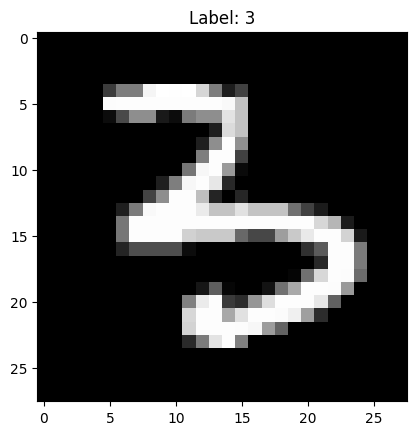

In [4]:
# Assuming you already have train_loader from your code
# Get one batch of images and labels
data_iter = iter(train_loader)
images, labels = next(data_iter)

# Get the first image and its label
image = images[0]
label = labels[0]

# Convert the tensor image to a numpy array
image = image.numpy().squeeze()

# Display the image
plt.imshow(image, cmap='gray')
plt.title(f'Label: {label.item()}')
plt.show()

# Training

In [5]:
# Intialize NN
model = NN(input_size=input_size, num_classes=num_classes).to(device)

# Loss and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=learning_rate)

# Train the NN
for epoch in range(num_epochs):
  for batch_idx, (data, targets) in enumerate(train_loader):
    # Get data to device
    data = data.to(device=device)
    targets = targets.to(device=device)
    # Correct the shape
    data = data.reshape(data.shape[0], -1)

    # Forward propagation
    scores = model(data)
    loss = criterion(scores, targets)

    # Backward propagation
    optimizer.zero_grad() # initialize all gradients to zero for each batch
    loss.backward()

    # Gradient descent or Adam step
    optimizer.step()

# Performance

In [6]:
# Check accuracy on training and test sets
def check_accuracy(loader, model):
  if loader.dataset.train:
    print("Checking accuracy on training data")
  else:
    print("Checking accuracy on test data")
  num_correct = 0
  num_samples = 0
  model.eval()

  with torch.no_grad():
    for x, y in loader:
      x = x.to(device=device)
      y = y.to(device=device)
      x = x.reshape(x.shape[0], -1)

      scores = model(x)
      _, predictions = scores.max(1)  # scores is 64x10 and we want to know which one of those the is the maximum value, so in max: dim=1
      num_correct += (predictions == y).sum()
      num_samples += predictions.size(0)

    print(f'got {num_correct} / {num_samples} with accuracy {float(num_correct)/float(num_samples)*100:.2f}')

  model.train()

In [7]:
check_accuracy(train_loader, model)
check_accuracy(test_loader, model)

Checking accuracy on training data
got 56057 / 60000 with accuracy 93.43
Checking accuracy on test data
got 9340 / 10000 with accuracy 93.40
